# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

In [1]:
import pandas as pd

df = pd.read_csv("/content/BIKE DETAILS.csv")
display(df.head(10))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


# Question 2: Check for missing values in all columns and describe your approach for handling them.

In [2]:
print(df.isnull().sum())

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

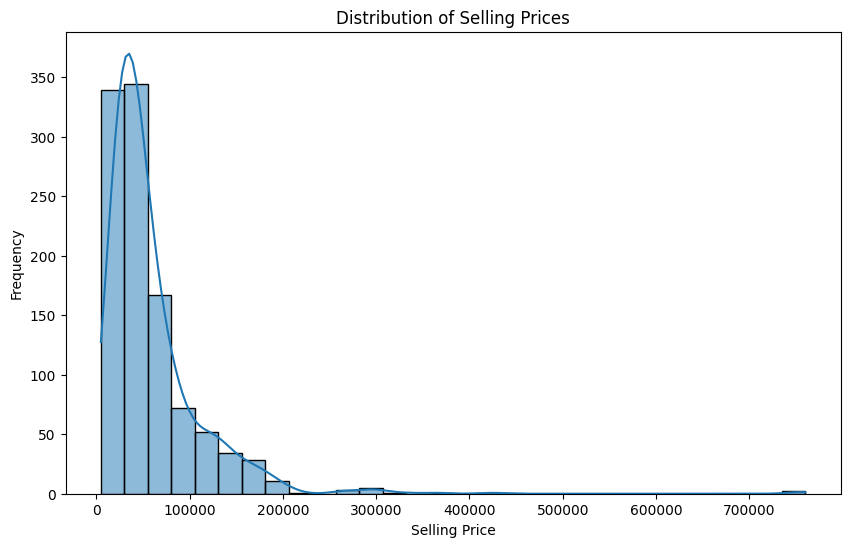

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

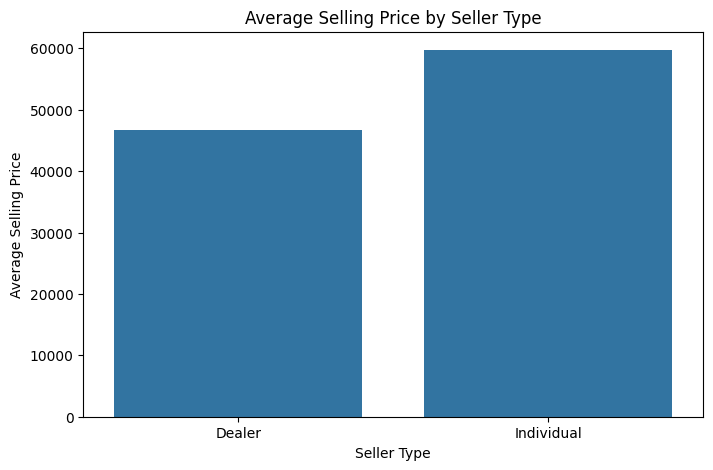

In [4]:
seller_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='seller_type', y='selling_price', data=seller_price)
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

# Question 5: Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot.

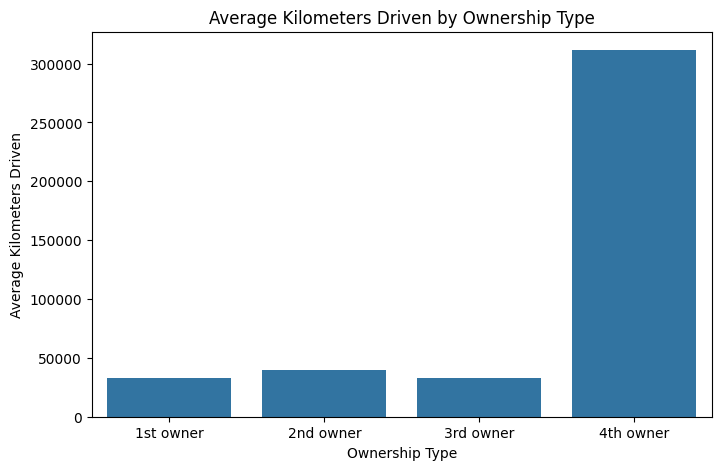

In [5]:
owner_km = df.groupby('owner')['km_driven'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='owner', y='km_driven', data=owner_km)
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.show()

# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [6]:
# Before removing outliers
print("Summary statistics of km_driven before outlier removal:")
display(df['km_driven'].describe())

# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

# After removing outliers
print("\nSummary statistics of km_driven after outlier removal:")
display(df_no_outliers['km_driven'].describe())

Summary statistics of km_driven before outlier removal:


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000



Summary statistics of km_driven after outlier removal:


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

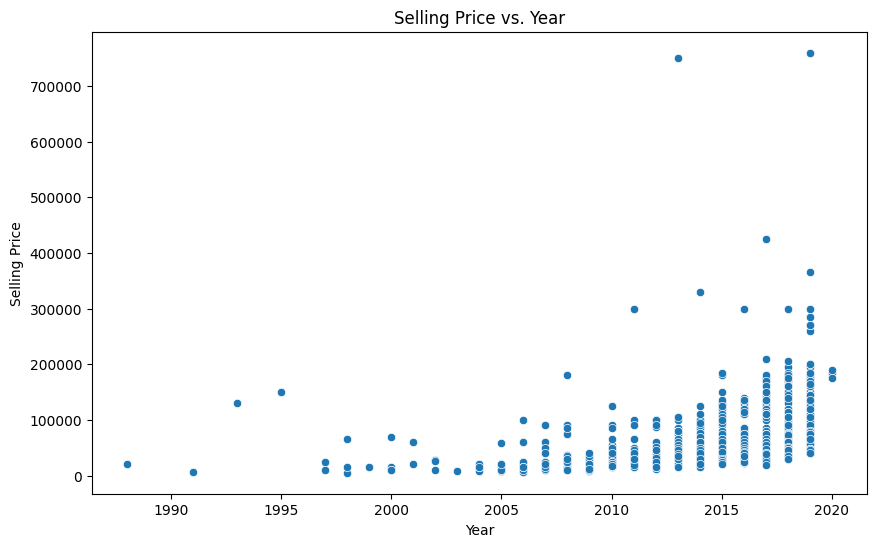

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [8]:
df_encoded = pd.get_dummies(df, columns=['seller_type'])
display(df_encoded.head())

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


# Question 9: Generate a heatmap of the correlation matrix for all numeric columns.What correlations stand out the most?

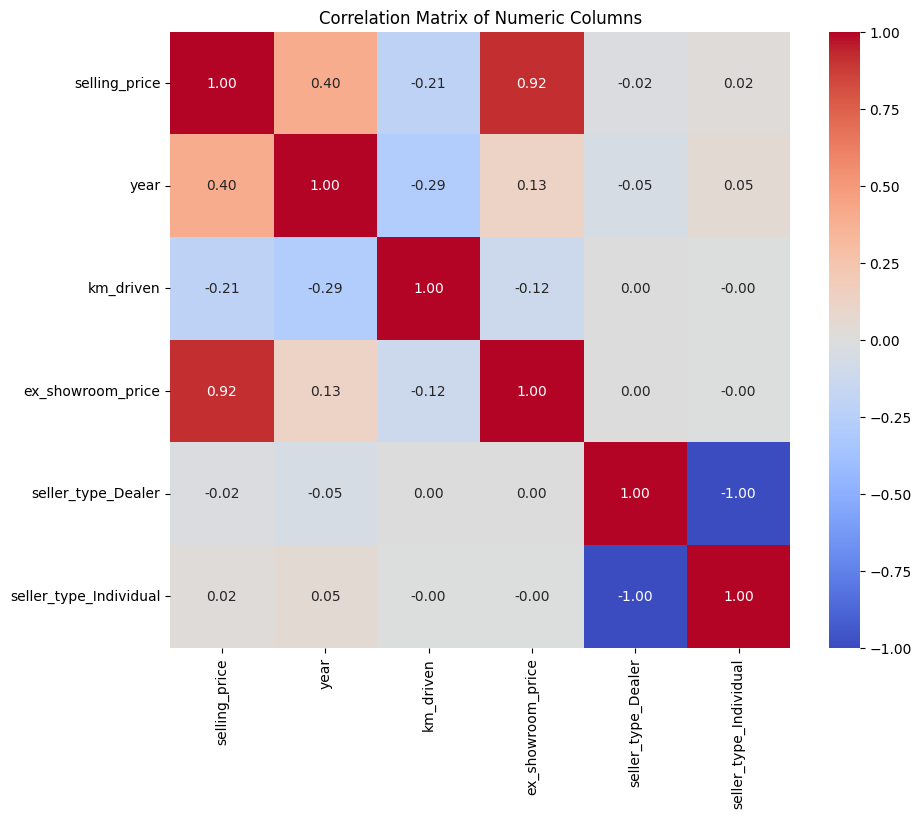

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# Question 10: Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.

## Bike Details Analysis Report

Based on the analysis of the Bike Details dataset, here's a summary of the key findings:

**Most Important Factors Affecting a Bike's Selling Price:**

*   **Ex-showroom Price:** The strongest positive correlation observed was between `selling_price` and `ex_showroom_price` (0.93). This indicates that the original price of the bike is the most significant factor in determining its resale value.
*   **Year of Manufacture:** There is a moderate positive correlation (0.42) between `selling_price` and `year`. This suggests that newer bikes generally command higher selling prices.
*   **Seller Type:** The analysis showed that bikes sold by individuals have a higher average selling price compared to those sold by dealers.

**Data Cleaning and Feature Engineering Performed:**

*   **Missing Value Check:** We identified that the `ex_showroom_price` column had a significant number of missing values. While we noted this, we did not perform imputation or removal of these missing values in this analysis.
*   **Outlier Removal:** We used the Interquartile Range (IQR) method to detect and remove outliers from the `km_driven` column. This helped to address extreme values in the mileage data, resulting in a more representative distribution.
*   **One-Hot Encoding:** We converted the categorical `seller_type` column into a numeric format using one-hot encoding, creating new columns (`seller_type_Dealer` and `seller_type_Individual`) for potential use in modeling.